**Utilizing Numba for CUDA Device Reset**

In [ ]:
!pip install numba -q
from numba import cuda
device = cuda.get_current_device()
device.reset()

**Installing Required Packages**

In [ ]:
!pip install llama-cpp-python langchain langchain-core langchain-community sentence-transformers transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 15.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.0/974.0 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.0 MB/s eta 0:00:00
     ━━

**Mounting Google Drive for Model Checkpoint**

In [ ]:
# Mounting my google drive to load model's checkpoint, you can download it from here: https://huggingface.co/microsoft/Phi-3-mini-4k-instruct-gguf/blob/main/Phi-3-mini-4k-instruct-q4.gguf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Analyzing Input Image**

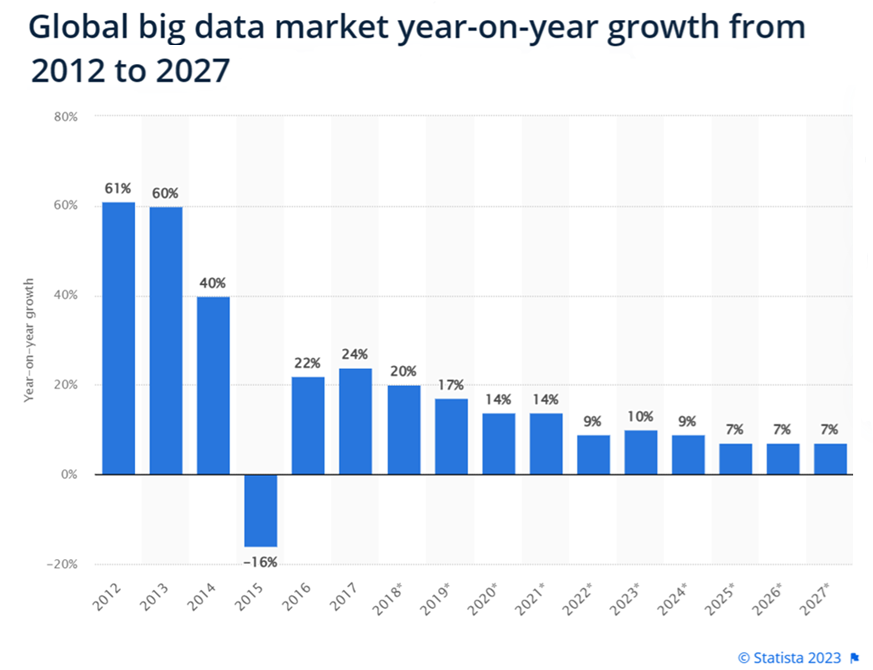

In [ ]:
# 1st Input Image to analyse:

from PIL import Image
image_path = 'g1.png'
Image.open(image_path).convert("RGB")

**Unorganized data extraction from the input Image**

In [ ]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
from PIL import Image
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.callbacks import CallbackManager, StreamingStdOutCallbackHandler
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline
from langchain_community.llms import LlamaCpp
import sys
import warnings


warnings.filterwarnings("ignore")


# Data visual text extarction model:
processor = Pix2StructProcessor.from_pretrained('google/deplot')
model = Pix2StructForConditionalGeneration.from_pretrained('google/deplot')

# Uploading image:
image = Image.open(image_path).convert("RGB")

inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")
predictions = model.generate(**inputs, max_new_tokens=512)

# context
unoranized_data = processor.decode(predictions[0], skip_special_tokens=True)

preprocessor_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

Arial.TTF:   0%|          | 0.00/276k [00:00<?, ?B/s]

**This is how raw image text data will look like**

In [ ]:
print(unoranized_data)

Characteristic | Year-on-year growth <0x0A> 2027* | 7% <0x0A> 2026* | 7% <0x0A> 2025* | 7% <0x0A> 2024* | 9% <0x0A> 2023* | 10% <0x0A> 2022* | 9% <0x0A> 2021* | 14% <0x0A> 2020* | 14% <0x0A> 2019* | 17% <0x0A> 2018* | 20% <0x0A> 2017 | 24% <0x0A> 2016 | 22% <0x0A> 2015 | -16% <0x0A> 2014 | 40% <0x0A> 2013 | 60% <0x0A> 2012 | 61%


**Configuration for text generation model**

In [ ]:
model_path='drive/MyDrive/phi_3_model/Phi-3-mini-4k-instruct-q4.gguf'



##################### Config #####################

# Callbacks support token-wise streaming
callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])

n_gpu_layers = -1
n_batch = 500


llm = LlamaCpp(
    model_path=model_path,
    temperature = 0.4,
    max_tokens = 2000,
    stop=["<|end|>"],
    echo=True,
    n_gpu_layers=n_gpu_layers,
    n_batch=n_batch,
    f16_kv=True,
    callback_manager=callback_manager,
    verbose=True,
)
##################################################


prompt = ChatPromptTemplate.from_template("""
<|user|>\nContext: {context}\nUser Query: {query}\nInstructions: I'm a helpful AI assistant who gives only context-specific responses to user's query<|end|>\n<|assistant|>
""")


chain = prompt | llm

llama_model_loader: loaded meta data with 24 key-value pairs and 195 tensors from drive/MyDrive/phi_3_model/Phi-3-mini-4k-instruct-q4.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = phi3
llama_model_loader: - kv   1:                               general.name str              = Phi3
llama_model_loader: - kv   2:                        phi3.context_length u32              = 4096
llama_model_loader: - kv   3:                      phi3.embedding_length u32              = 3072
llama_model_loader: - kv   4:                   phi3.feed_forward_length u32              = 8192
llama_model_loader: - kv   5:                           phi3.block_count u32              = 32
llama_model_loader: - kv   6:                  phi3.attention.head_count u32              = 32
llama_model_loader: - kv   7:               phi3.attention.he

**Transforming Unorganized Data into Structured Format**

In [ ]:
query='Transform the given contextual data into a well structured data format'
organized_data = chain.invoke({"context": unoranized_data, "query": query})

 Here is the transformed data in a well-structured format:

| Year | Year-on-year Growth (%) |
|------|-------------------------|
| 2017 | 24                      |
| 2016 | 22                      |
| 2015 | -16                     |
| 2014 | 40                      |
| 2013 | 60                      |
| 2012 | 61                      |
| 2027 | 7                       |
| 2026 | 7                       |
| 2025 | 7                       |
| 2024 | 9                       |
| 2023 | 10                      |
| 2022 | 9                       |
| 2021 | 14                      |
| 2020 | 14                      |
| 2018 | 20                      |
| 2019 | 17


llama_print_timings:        load time =   77841.14 ms
llama_print_timings:      sample time =     133.15 ms /   253 runs   (    0.53 ms per token,  1900.06 tokens per second)
llama_print_timings: prompt eval time =   77840.61 ms /   259 tokens (  300.54 ms per token,     3.33 tokens per second)
llama_print_timings:        eval time =  109852.82 ms /   252 runs   (  435.92 ms per token,     2.29 tokens per second)
llama_print_timings:       total time =  188620.36 ms /   511 tokens


**Summarization for Uploaded Data Visual Image**

In [ ]:
print(f'##################  Summarization for uploaded data visual image  ##################')
summary='Write a summary, comprising 150 to 200 words, delineating the significant information, trends, and insights:'
response = chain.invoke({"context": organized_data, "query": summary})


##################  Summarization for uploaded data visual image  ##################


Llama.generate: prefix-match hit


 The provided data outlines the yearly growth percentage from 2015 to 2 Written in an academic tone, summarizing the significant information, trends, and insights based on the given table:

The dataset presents a comprehensive view of annual growth percentages for a particular entity over a span of nine years (2015-2027). A notable observation is that there was a negative growth rate in 2015 (-16%), indicating an economic downturn or challenging period. However, the subsequent year witnessed substantial recovery with a remarkable surge to 40%, followed by consistent positive growth trends.

The years 2013-2017 exhibited robust performance, with growth rates ranging from 60% to 24%. This upward trajectory suggests that the entity experienced significant expansion and success during


llama_print_timings:        load time =   77841.14 ms
llama_print_timings:      sample time =     116.95 ms /   188 runs   (    0.62 ms per token,  1607.46 tokens per second)
llama_print_timings: prompt eval time =   89184.93 ms /   316 tokens (  282.23 ms per token,     3.54 tokens per second)
llama_print_timings:        eval time =   83667.94 ms /   187 runs   (  447.42 ms per token,     2.24 tokens per second)
llama_print_timings:       total time =  173592.60 ms /   503 tokens


**Output Result Of Summarization:**
 The provided data outlines the yearly growth percentage from 2015 to 2 Written in an academic tone, summarizing the significant information, trends, and insights based on the given table:

The dataset presents a comprehensive view of annual growth percentages for a particular entity over a span of nine years (2015-2027). A notable observation is that there was a negative growth rate in 2015 (-16%), indicating an economic downturn or challenging period. However, the subsequent year witnessed substantial recovery with a remarkable surge to 40%, followed by consistent positive growth trends.

The years 2013-2017 exhibited robust performance, with growth rates ranging from 60% to 24%. This upward trajectory suggests that the entity experienced significant expansion and success during

**NOTE:** It abruptly halts text generation as it exceeds the maximum token range limit.

**Question Answering loop for Uploaded Data Visual Image**

In [ ]:
print("Question Answering session starts here, you can type 'exit' or 'quit' to end this session: ")


while True:
    query = input('Ask questions to your uploaded data visual image =====> ')
    if query.lower() in ['exit','quit']:
        print('Quiting')
        sys.exit()


    response = chain.invoke({"query": query,"context": organized_data})
    print(response)



Question Answering session starts here, you can type 'exit' or 'quit' to end this session: 
Ask questions to your uploaded data visual image =====> What is the minimum year-on-year growth rate and in which year did it occur?


Llama.generate: prefix-match hit


 The minimum year-on-year growth rate occurred in the year 2015 with a value of -16%.

This information is derived from the given data table, where you can see that each row corresponds to a particular year and its associated year-on-year growth percentage. By comparing all the values listed under "Year-on-year Growth (%)," we find the smallest value (-16%) which indicates a negative growth rate for that specific year. This is an important metric as it shows years where there was actually a decline in growth, rather than an increase.


llama_print_timings:        load time =   77841.14 ms
llama_print_timings:      sample time =      77.59 ms /   126 runs   (    0.62 ms per token,  1623.94 tokens per second)
llama_print_timings: prompt eval time =   13088.68 ms /    46 tokens (  284.54 ms per token,     3.51 tokens per second)
llama_print_timings:        eval time =   54100.55 ms /   125 runs   (  432.80 ms per token,     2.31 tokens per second)
llama_print_timings:       total time =   67625.52 ms /   171 tokens


 The minimum year-on-year growth rate occurred in the year 2015 with a value of -16%.

This information is derived from the given data table, where you can see that each row corresponds to a particular year and its associated year-on-year growth percentage. By comparing all the values listed under "Year-on-year Growth (%)," we find the smallest value (-16%) which indicates a negative growth rate for that specific year. This is an important metric as it shows years where there was actually a decline in growth, rather than an increase.
Ask questions to your uploaded data visual image =====> exit
Quiting


SystemExit: 

**Output Result Of Question Answering**

**Question:** What is the minimum year-on-year growth rate and in which year did it occur?

**Model answer:** The minimum year-on-year growth rate occurred in the year 2015 with a value of -16%.

**NOTE:** SystemExit error will occur if you terminate the question answering loop by typing 'exit' or 'quit'.